#### Random forest Classification

In [15]:
#imports
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix ,recall_score ,precision_score,f1_score,roc_curve,roc_auc_score
from sklearn import linear_model, datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier

In [16]:
#file reads
X1 = pd.read_csv('Error_50k+test+10e_may18.csv')


In [17]:
Y = X1['Rating']
X1 = X1.drop('Rating',1)


In [18]:
# split into train and test
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import time

x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y, train_size=0.8,test_size = 0.2,random_state = 10)


In [19]:
#  Random forest classifier function
# Parameters selected from the grid search results.
def forest_classifier(n, criterion,x_train,x_test,y_train,y_test, X, Y):
    rfc = RandomForestClassifier(n_estimators = n, criterion = criterion,random_state = 10)
    start1 = time.clock() 
    rfc.fit(x_train,y_train)
    end = (time.clock() - start1)
    scores = cross_val_score(rfc, X,Y, cv=10)
    print("Training time =", end)
    print("Cross validation score=",scores)
    y_pred = rfc.predict(x_test)
    print("Accuracy Score = " ,accuracy_score(y_test, y_pred) )
    print("R2 Score")
    print(r2_score(y_test, y_pred))
    print("Confusion Matrix \n")
    print(confusion_matrix(y_test,y_pred))
    print("Classification Report \n")
    print(classification_report(y_test,y_pred))
#     number of classes for ROC
    y = label_binarize(y_test, classes=[0,1, 2, 3, 4, 5])
    num_classes = y.shape[1]
    pred_roc = rfc.predict_proba(x_test)
    print(visualize_results(pred_roc,num_classes,y))
    return rfc

In [20]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
# ROC curve for RandomForest
def visualize_results(pred_roc,num_classes,y):
    unique, counts = np.unique(pred_roc, return_counts=True)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], pred_roc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['navy', 'turquoise', 'darkorange', 'aqua', 'teal','green','red','black','brown','pink'])
    plt.figure(figsize=(7, 8))
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')

    for i, color in zip(range(num_classes), colors):
        l, = plt.plot(fpr[i], tpr[i], color=color, lw=2)
        lines.append(l)
        labels.append('TPR-FPR for class {0} (area = {1:0.2f})'
                      ''.format(i, roc_auc[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Extension of FPR-TPR curve to multi-class')
    plt.legend(lines, labels, loc=(0, -.5), prop=dict(size=14))
    plt.show()


Training time = 3.6668540000000007
Cross validation score= [0.39057841 0.83419483 0.8387674  0.83257109 0.83117916 0.83376417
 0.83336647 0.84171804 0.83571997 0.40350179]
Accuracy Score =  0.8324716643467887
R2 Score
0.7533131234855566
Confusion Matrix 

[[ 776  104    0    0    0    0]
 [  86 1790  517  178  169   58]
 [   0  153 2633    0    0    0]
 [   0    1   82 1628   67    0]
 [   0    1    0   10 1109  105]
 [   0    1    0    0  153  437]]
Classification Report 

             precision    recall  f1-score   support

          0       0.90      0.88      0.89       880
          1       0.87      0.64      0.74      2798
          2       0.81      0.95      0.88      2786
          3       0.90      0.92      0.91      1778
          4       0.74      0.91      0.81      1225
          5       0.73      0.74      0.73       591

avg / total       0.84      0.83      0.83     10058



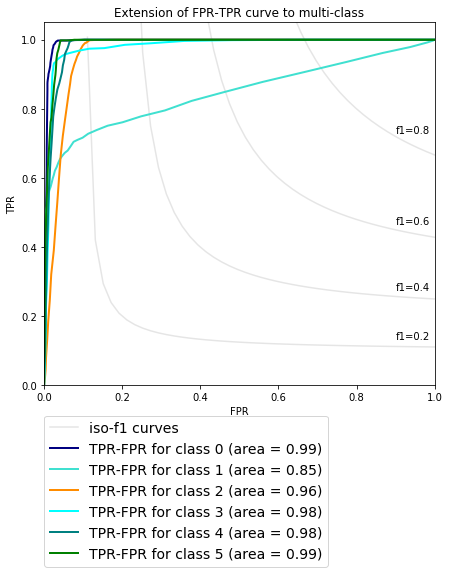

None


In [21]:
rfc = forest_classifier(50,'entropy',x1_train,x1_test,y1_train,y1_test,X1,Y)